In [3]:
import numpy as np
import pulp as pulp
from pulp import *
import random
from tqdm import tqdm
from useful import *
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator
from scipy.stats import linregress
from scipy.optimize import minimize

# Figure 1

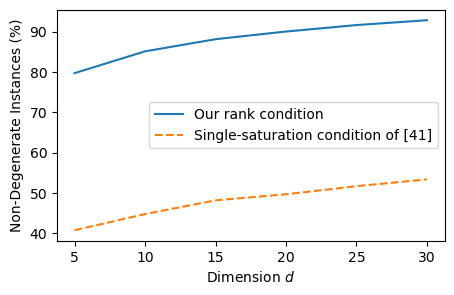

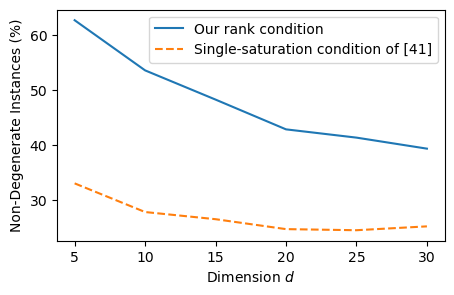

In [6]:
# Dimensions
d = [5, 10, 15, 20, 25, 30]

# Data for each category
strong_dense = [797, 851, 881, 900, 916, 928]
weak_dense = [408, 448, 482, 497, 517, 534]
strong_tri = [627, 536, 483, 429, 414, 394]
weak_tri = [331, 279, 266, 248, 246, 253]

# Transforming the values into percentages (values out of 1000)
strong_dense_percent = [x / 1000 * 100 for x in strong_dense]
weak_dense_percent = [x / 1000 * 100 for x in weak_dense]
strong_tri_percent = [x / 1000 * 100 for x in strong_tri]
weak_tri_percent = [x / 1000 * 100 for x in weak_tri]

# Recreating the bar plot with percentages and adjusted legend
for (strong,weak,name) in [(strong_dense_percent, weak_dense_percent, 'dense'),
                           (strong_tri_percent, weak_tri_percent, 'tri')]:
    plt.figure(figsize=(5,3))
    plt.plot(d, strong, label='Our rank condition')
    plt.plot(d, weak, '--', label='Single-saturation condition of [41]')
    plt.xlabel('Dimension $d$')
    plt.ylabel('Non-Degenerate Instances (%)')
    plt.legend()
    #plt.grid(True, linestyle='--', alpha=0.7)

    plt.savefig("../Weakly-coupled-MDPs_EJOR/figure/non-degenerate-percentage_{}.pdf".format(name),
               bbox_inches='tight')


# Figure 2

<Figure size 800x400 with 0 Axes>

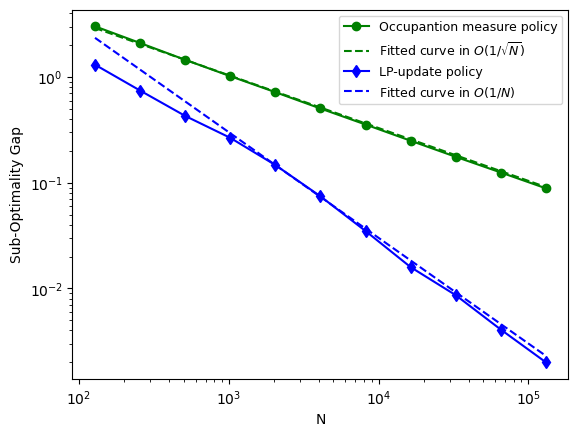

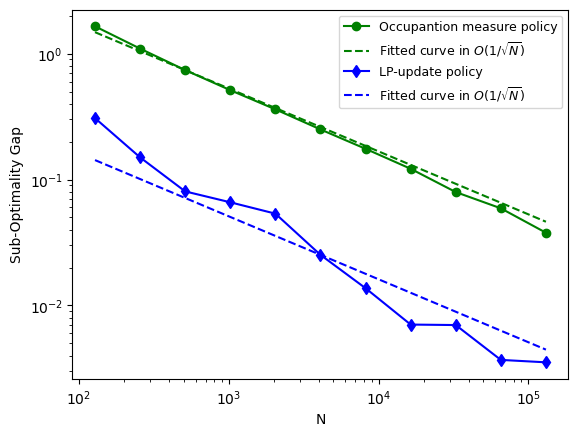

In [5]:
plt.figure(figsize=(8, 4))

for data, name in [(np.load('non-degenerate-sim1.npz', allow_pickle=True),'nondege'),
                      (np.load('degenerate-sim1.npz', allow_pickle=True),'dege')]:
    myN = np.array([2**n for n in range(7,18)])
    infos = data['collect_infos']
    infos = infos.tolist()

    plt.figure()
    diff_update = [info[0] - info[1][0] for info in infos]
    diff_occupation_measure = [info[0] - info[2][0] for info in infos]
    diff_FTVA = [info[0] - info[3][0] for info in infos]

    plt.loglog(myN, diff_occupation_measure, '-o', label='Occupantion measure policy', color = 'g')
    plt.plot(myN, (myN/myN[2])**(-0.5)*diff_occupation_measure[2], '--', color = 'g', label=r"Fitted curve in $O(1/\sqrt{N})$")
    
    #plt.loglog(myN, diff_FTVA, '-v', label='FTVA policy', color = 'r')
    #plt.plot(myN, (myN/myN[2])**(-0.5)*diff_FTVA[2], '--', color = 'r', label=r"Fitted curve in $O(1/\sqrt{N})$")

    plt.loglog(myN, diff_update, '-d', color = 'b', label='LP-update policy')
    if name=='nondege':
        plt.plot(myN, (myN/myN[4])**(-1.)*diff_update[4], '--', color = 'b', label=r'Fitted curve in $O(1/N)$')
    else:
        plt.plot(myN, (myN/myN[5])**(-0.5)*diff_update[5], '--', color = 'b', label=r'Fitted curve in $O(1/\sqrt{N})$')
    
    plt.legend(fontsize=9)
    plt.xlabel('N')
    plt.ylabel('Sub-Optimality Gap')

    plt.savefig('../convergence_rate_{}.pdf'.format(name),
                bbox_inches='tight')

# Figure 3

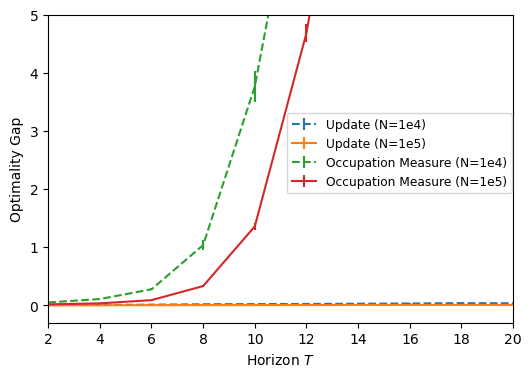

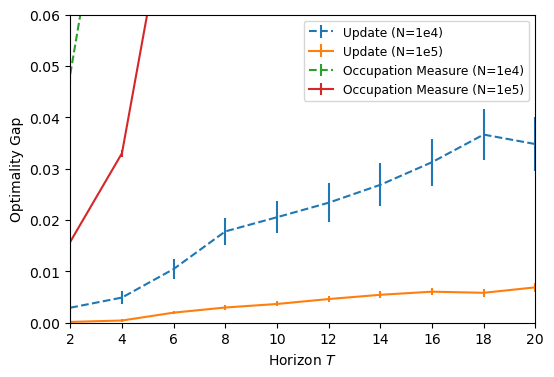

In [28]:
# N = 10000
infos = [[5.663710678647074, [5.66214922696591, 1.7763568394002505e-15], [5.643979869502134, 0.011318425213910247], [5.631890534331003, 0.020906490271964086]],
[11.13926065225175, [11.136337500060261, 0.008272239560813568], [11.090818956573655, 0.01977992044319496], [11.07325989387481, 0.028786788513239393]],
[16.636309811289134, [16.631995524461963, 0.0103976757277098], [16.5668908359881, 0.02613965447948561], [16.54432335645741, 0.035257294111057214]],
[22.102873519577027, [22.097975070680995, 0.014208296942137315], [21.994962738717046, 0.04384710262580452], [21.9866082352008, 0.039465730121096686]],
[27.60433754204474, [27.5935420105886, 0.01684372721763979], [27.363719047720878, 0.1565906002325303], [27.453908528888505, 0.0448035451293791]],
[33.08768566259808, [33.077228745071345, 0.021149656349272142], [32.813109017007655, 0.16271990741373932], [32.90857821309226, 0.050977865649247646]],
[38.600147831687416, [38.58531409832214, 0.02286197591703624], [38.05616715798913, 0.3878298000231374], [38.39575427281129, 0.052872895979744164]],
[44.099831752565834, [44.08204550245003, 0.02705418100388935], [43.06407899621417, 0.8977954092904205], [43.86308653455073, 0.06152793850055851]],
[49.617393100737075, [49.597592611534814, 0.029245530714319474], [47.509208423477816, 1.7611090495804547], [49.351085400020246, 0.06700303463302028]],
[55.12895910202472, [55.108409665582805, 0.03331867277816655], [51.361994017522726, 2.877391142795951], [54.83511514944162, 0.07826964472253822]],
[60.65054378467326, [60.62774279820251, 0.035464761228674035], [54.581956390433305, 3.7370743738483343], [60.33147332818335, 0.07718917901404761]],
[66.16918266941904, [66.14580773602627, 0.039615794543809375], [57.691873366388506, 4.659569336424897], [65.81777614918897, 0.08945319803463987]],
[71.69363063160374, [71.66664605591333, 0.041296106977109226], [60.18305290794693, 5.090732299129091], [71.3128910705882, 0.08505071393195766]],
[77.21653943580928, [77.18968179591073, 0.0440956356726234], [62.933135372788094, 5.460042670357341], [76.81584178345696, 0.09113613111692868]],
[82.74293083214722, [82.71349178743809, 0.04607169312595212], [65.45999216094597, 5.884109146620919], [82.30425634444411, 0.09988522172528064]],
[88.26845509914274, [88.23718830181984, 0.04820767243105484], [68.31036820163533, 6.311474702868357], [87.80107747681221, 0.10293038434744027]],
[93.79612789223654, [93.76346848424136, 0.04977182438674452], [70.64744922298866, 6.047890943307006], [93.30101000782095, 0.11083055167058732]],
[99.32327356850624, [99.28662458587635, 0.05311532402811746], [73.29162743958575, 5.91268358534865], [98.79900880640199, 0.11359277543170379]],
[104.85177597187227, [104.81467123053811, 0.057655386047708215], [76.15950800374225, 6.212595622979675], [104.29630639022157, 0.11706260587354958]],
[110.3799364685871, [110.3451301320203, 0.0547638539959799], [79.23011220335809, 6.827554453983608], [109.80304659056311, 0.11058670598435703]]]

# N = 100000
infos1 = [[11.138807524528668, [11.13864856396491, 0.0024210529038430793], [11.123032245235676, 0.006855168710301664], [11.11867248434954, 0.008489823651109674]],
[22.102302731697637, [22.1018729054783, 0.004469762665211278], [22.069296394419126, 0.013487928260440046], [22.065524207040717, 0.011495865887714767]],
[33.08705597798163, [33.085092904680195, 0.006418864323180288], [32.99864843736979, 0.051994271270175994], [33.02877436465769, 0.01577077120832091]],
[44.099164079886656, [44.09620134156413, 0.008496564011198913], [43.76838701616914, 0.28913204932870307], [44.024886453193666, 0.021499196318923712]],
[55.12826768801393, [55.12461571506086, 0.010322443232000636], [53.76948945852864, 1.2731593522996156], [55.03273502696995, 0.024308268070184366]],
[66.1684762819279, [66.1638648754989, 0.012266413311282661], [61.48116687306512, 3.406484575477976], [66.0569919294513, 0.027084227941939463]],
[77.21582362326915, [77.21038451222995, 0.013632942426370002], [67.42084370895739, 4.939305337793648], [77.08541418681065, 0.0283552546244627]],
[88.26773316964824, [88.26168770245043, 0.015199751754528893], [72.73088711244651, 5.905857203768846], [88.12453613373711, 0.029465245032721753]],
[99.32254799859749, [99.31671857292609, 0.016881891922822738], [77.89113956150197, 6.394463292094271], [99.16032563805692, 0.036188327413043446]],
[110.37920859489529, [110.37231963344811, 0.018420582981405628], [83.07738459582228, 6.403007113480616], [110.19407844298317, 0.03660715792064187]]]
nb_experiments_10e5 = 4000
nb_experiments_10e4 = 1000

myT = np.arange(1,21,1)
myT1 = np.arange(2,22,2)

diff_update = [info[0] - info[1][0] for info in infos]
std_update = [info[1][1]*3/np.sqrt(nb_experiments_10e4) for info in infos]

diff_update1 = [info1[0] - info1[1][0] for info1 in infos1]
std_update1 = [info1[1][1]*3/np.sqrt(nb_experiments_10e5) for info1 in infos1]

diff_occupation_measure = [info[0] - info[2][0] for info in infos]
std_occupation_measure = [info[2][1]*3/np.sqrt(nb_experiments_10e4) for info in infos]

diff_occupation_measure1 = [info1[0] - info1[2][0] for info1 in infos1]
std_occupation_measure1 = [info1[2][1]*3/np.sqrt(nb_experiments_10e5) for info1 in infos1]

diff_FTVA = [info[0] - info[3][0] for info in infos]
std_FTVA = [info[3][1]*3/np.sqrt(nb_experiments_10e4) for info in infos]

diff_FTVA1 = [info1[0] - info1[3][0] for info1 in infos1]
std_FTVA1 = [info1[3][1]*3/np.sqrt(nb_experiments_10e5) for info1 in infos1]

plt.figure(figsize=(6, 4))
plt.xlabel('Horizon $T$')
plt.ylabel('Optimality Gap')

# First subplot: error bars
plt.errorbar(myT1, diff_update[1::2], yerr=std_update[1::2], label='Update (N=1e4)', fmt='--')#, fmt='d-',color='navy')
plt.errorbar(myT1, diff_update1, yerr=std_update1, label='Update (N=1e5)')#, fmt='d--', color = 'skyblue')

plt.errorbar(myT1, diff_occupation_measure[1::2], yerr=std_occupation_measure[1::2], label='Occupation Measure (N=1e4)',fmt='--')#, fmt='o-', 
             #color='green')
plt.errorbar(myT1, diff_occupation_measure1, yerr=std_occupation_measure1, label='Occupation Measure (N=1e5)')#, fmt='o--', 
             #color='darkgreen')

#plt.errorbar(myT1, diff_FTVA[1::2], yerr=std_FTVA[1::2], label='FTVA (N=1e4)', fmt='v-',color='r')
#plt.errorbar(myT1, diff_FTVA1, yerr=std_FTVA1, label='FTVA (N=1e5)', fmt='v--', 
#             color='salmon')

plt.xlim(2, 20)
plt.ylim(-0.3, 5)

plt.legend(loc = 'upper left', bbox_to_anchor=(0.5, 0.7), fontsize=8.8)

plt.savefig("../gap-with-T.pdf", bbox_inches='tight')

plt.figure(figsize=(6, 4))
plt.xlabel('Horizon $T$')
plt.ylabel('Optimality Gap')

# First subplot: error bars
plt.errorbar(myT1, diff_update[1::2], yerr=std_update[1::2], label='Update (N=1e4)',fmt='--')#, fmt='d-', color = 'navy')
plt.errorbar(myT1, diff_update1, yerr=std_update1, label='Update (N=1e5)')#, fmt='d--', color ='skyblue')

plt.errorbar(myT1, diff_occupation_measure[1::2], yerr=std_occupation_measure[1::2], label='Occupation Measure (N=1e4)',fmt='--')#, fmt='o-', 
             #color = 'green')
plt.errorbar(myT1, diff_occupation_measure1, yerr=std_occupation_measure1, label='Occupation Measure (N=1e5)')#, fmt='o--', 
             #color='darkgreen')

#plt.errorbar(myT1, diff_FTVA[1::2], yerr=std_FTVA[1::2], label='FTVA (N=1e4)', fmt='v-', color = 'red')
#plt.errorbar(myT1, diff_FTVA1, yerr=std_FTVA1, label='FTVA (N=1e5)', fmt='v--', 
#             color='salmon')

plt.ylim(-0.003, 0.15)
plt.ylim(0, 0.06)
plt.xlim(2, 20)
plt.legend(fontsize=8.8)

plt.savefig("../gap-with-T_zoom.pdf", bbox_inches='tight')


## Figures with MIP-LP vs LP

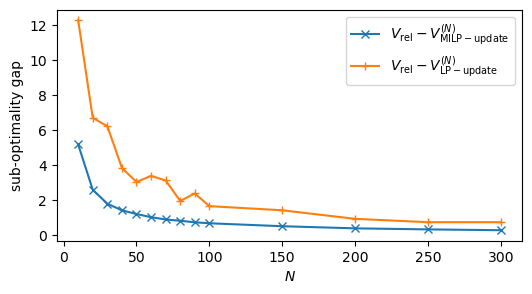

In [4]:
infos = [[51.45484894727231, [46.59140021735834, 1.326087013056494], [39.49887391383678, 1.6378165406287537], [40.56655956827256, 1.9678214872243804]], [51.52240613049736, [49.18285138042963, 0.9435215508549697], [45.077335707693024, 1.0860320835015937], [43.894033705928386, 1.4240325923333712]], [51.68687704665797, [49.97406770174782, 0.7440447601801832], [45.549892873009576, 1.016332030575215], [45.49656698764496, 1.1951868892530415]], [51.71781795120535, [50.35605250508667, 0.6459176806014807], [47.93259306480749, 0.7147343246216507], [46.24608685648311, 1.067854767280011]], [51.73684151846363, [50.565093730144895, 0.5841632130235159], [48.737626918888935, 0.6456423480949337], [46.900403151289886, 0.9708748126323699]], [51.73559672626056, [50.74622133375391, 0.5424269950588887], [48.388989657494626, 0.6653644145866283], [47.374038040371246, 0.8870743839781117]], [51.76525294398579, [50.87715313296434, 0.4964034655004387], [48.648438986706026, 0.6005585781288233], [47.65441302153371, 0.8408317945802937]], [51.74100007094626, [50.95019928133101, 0.47374796854735834], [49.81908933399675, 0.5207988204394903], [47.94960157566481, 0.8009347285598188]], [51.73960807949654, [51.03841125670205, 0.4363580300258657], [49.39410680769502, 0.5419068683153304], [48.154201322974195, 0.7598252892766136]], [51.76005619708744, [51.094364503467034, 0.42106993482178917], [50.1158115063615, 0.46343978049924506], [48.36504960658531, 0.7192274121786373]], [51.7628895972133, [51.262971275775044, 0.347532770863088], [50.35256897807759, 0.3969436033891153], [49.0056576060645, 0.6056253427539584]], [51.778320209018624, [51.384262644287816, 0.3009502968920676], [50.84184780808246, 0.3253245834925403], [49.39938798360225, 0.5324272241394781]], [51.778217691873984, [51.44356669523452, 0.2750351473087623], [51.033662358464795, 0.28885656139817095], [49.67522198706938, 0.47991530480558126]], [51.78717491258444, [51.49120447192601, 0.24989483780469327], [51.03357237075022, 0.2687125030073363], [49.86029269802959, 0.4368472107439662]]]

myN = [10,20,30,40,50,60,70,80,90,100,150,200,250,300]

gaps = np.array([0.35744299708491667, 0.2394342682633308, 0.11711329763635092, 0.07682051941964119, 0.05036990395601748, 0.06839361803375965, 
        0.03344849234250802, 0.052551767126871596, 0.05090449815983078, 0.04027069696508079, 0.03306537830620471, 0.015448777908240174, 
        0.018653306016382487, 0.008780062935066724])

Vrel = infos[-1][0]
diff_update_rounding = [Vrel - info[1][0] for info in infos]
diff_update = [Vrel - info[2][0] for info in infos]
#gaps2 = [Vrel - info[0] for info in infos] # this should be close to "gaps"

#diff_om = [info[0] - info[3][0] for info in infos]

plt.figure(figsize=(6, 3))

# Plotting original data
plt.plot(myN, diff_update_rounding, 'x-', label='$V_{\mathrm{rel}} - V_{\mathrm{MILP-update}}^{(N)}$')
plt.plot(myN, diff_update, '+-', label='$V_{\mathrm{rel}} - V_{\mathrm{LP-update}}^{(N)}$')
#plt.plot(myN, diff_om, label='$V_{\mathrm{rel-MIP}}^{(N)} - V_{\mathrm{om}}^{(N)}$', marker='v',color='red')
#plt.plot(myN, gaps,'+--',label='$V_{\mathrm{rel}}-V_{\mathrm{rel}}^{(N)}$')


#plt.errorbar(myN, data[func_name]['avg_times'], yerr=data[func_name]['std_errors'], label=labels[i], marker='o', color = colors[i])

# Labels, title, and legend
plt.xlabel(r'$N$')
plt.ylabel(r'sub-optimality gap')
plt.legend()


plt.savefig("../Weakly-coupled-MDPs_EJOR/figure/MIP_vs_LP.pdf", bbox_inches='tight')

([0.35744299708491667,
  0.2394342682633308,
  0.11711329763635092,
  0.07682051941964119,
  0.05036990395601748,
  0.06839361803375965,
  0.03344849234250802,
  0.052551767126871596,
  0.05090449815983078,
  0.04027069696508079,
  0.03306537830620471,
  0.015448777908240174,
  0.018653306016382487,
  0.008780062935066724],
 [0.33232596531212977,
  0.26476878208708143,
  0.10029786592647127,
  0.06935696137909275,
  0.05033339412081261,
  0.051578186323880004,
  0.021921968598647368,
  0.04617484163818375,
  0.047566833087898885,
  0.02711871549700362,
  0.024285315371137983,
  0.008854703565816635,
  0.008957220710456681,
  0.0])

# More Figures

In [124]:
data = {'update_rounding_sim': {'avg_times': [0.8067802166938782, 0.8589344120025635, 0.8491031599044799, 0.8583374142646789, 0.8437638092041015, 0.8564044666290284, 0.8407417392730713, 0.896675386428833, 0.8723143029212952, 0.8944582128524781, 0.8888340139389038, 0.8551302695274353, 0.8459893274307251, 0.8982830119132995], 'std_errors': [0.025628564695703168, 0.03449915861918289, 0.03303472895409455, 0.03167087286811208, 0.030896203466137476, 0.028623853357744505, 0.02856788760597552, 0.03392271207567582, 0.030585164901606628, 0.033741432820487104, 0.0330261156512137, 0.027545097632425384, 0.028824647653847596, 0.03600778338297867]}, 'update_sim': {'avg_times': [0.6263935947418213, 0.624156322479248, 0.6166869497299194, 0.6102877116203308, 0.6115299344062806, 0.6254334163665771, 0.6165425896644592, 0.6141720128059387, 0.617176399230957, 0.6157355093955994, 0.621387710571289, 0.621642997264862, 0.6207287955284119, 0.6252661156654358], 'std_errors': [0.0070136688844157, 0.01182359332722578, 0.005745234605393352, 0.008050617025294199, 0.006895473193135418, 0.00656995509287359, 0.005998160701553017, 0.008259002466048361, 0.006750764180800452, 0.005901753872410743, 0.007151710222377562, 0.005563686832294292, 0.006560307336955304, 0.0053732484503872064]}, 'occupation_measure_sim': {'avg_times': [0.04836930990219116, 0.04907083034515381, 0.05205840826034546, 0.057128331661224364, 0.06813009262084961, 0.09090797185897827, 0.12834211111068725, 0.20705012559890748, 0.3312456226348877, 0.6044313812255859, 1.1089631581306458, 2.085506405830383, 4.158887550830841, 8.037896831035614], 'std_errors': [0.001411044652061778, 0.0013903372825608425, 0.0015987688562857237, 0.002060573799933088, 0.002498115504827402, 0.002744236795756638, 0.004348067411798237, 0.008938641692007766, 0.013992233652800551, 0.0206713049211879, 0.034866225736837335, 0.049656046378122674, 0.12242735671162469, 0.17870468193077768]}}

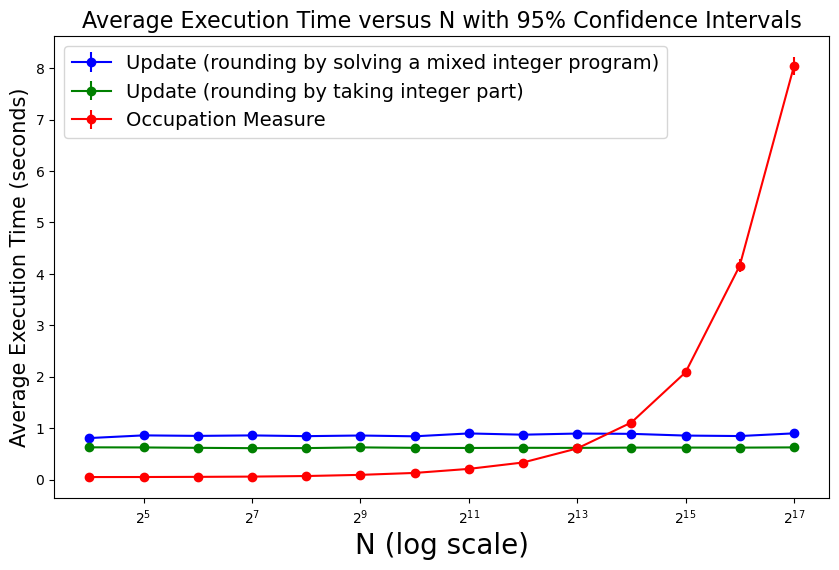

In [125]:
myN = [2**n for n in range(4, 18)]

# Plotting the average execution times with 95% confidence intervals
plt.figure(figsize=(10, 6))

labels = ['Update (rounding by solving a mixed integer program)', 'Update (rounding by taking integer part)', 'Occupation Measure']
colors = ['blue', 'green', 'red']

for i,func_name in enumerate(data):
    plt.errorbar(myN, data[func_name]['avg_times'], yerr=data[func_name]['std_errors'], label=labels[i], marker='o', color = colors[i])

plt.xlabel('N (log scale)',size=20)
plt.ylabel('Average Execution Time (seconds)',size=15)
plt.title('Average Execution Time versus N with 95% Confidence Intervals',size=16)
plt.legend(fontsize=14)
plt.xscale('log', base=2)  # Using log scale for x-axis

plt.savefig("time1.pdf")

In [3]:
data = {'update_rounding_sim': {'avg_times': [4.534726256132126, 4.282630836963653, 4.485021990537644, 4.3653681635856625, 4.376568698883057, 4.272644430398941, 4.6099793195724486, 4.43660728931427, 4.4562082409858705, 4.803092205524445, 4.435216957330704, 4.662608569860458, 4.232284647226334, 4.04367647767067], 'std_errors': [0.47409689024598295, 0.3327519739062571, 0.4188557114064065, 0.3827402395590815, 0.4164174790137838, 0.39872293924962776, 0.6392460526166471, 0.39167299064614464, 0.461872371091452, 0.7358725232781754, 0.4461556707068268, 0.4842273795073297, 0.41706895098596247, 0.2750154570311921]}, 'update_sim': {'avg_times': [1.9777049839496612, 1.9989253163337708, 2.0516125917434693, 2.032827800512314, 2.00826296210289, 1.9934569478034974, 1.9960575461387635, 1.9618494510650635, 1.9159554600715638, 1.9680978775024414, 1.9751586854457854, 1.9347118020057679, 1.6184190809726715, 1.584240585565567], 'std_errors': [0.02187287024748745, 0.022638450510275764, 0.031859762359795096, 0.05752915705521101, 0.020818286205826896, 0.01812611538159575, 0.02517631052714767, 0.020623463720734585, 0.01940057374723193, 0.020315850416971155, 0.021807443356425055, 0.03726250959569867, 0.020844080780052947, 0.01614983592013064]}, 'occupation_measure_sim': {'avg_times': [0.1335750102996826, 0.14009366035461426, 0.14581403732299805, 0.1612017810344696, 0.1815617024898529, 0.22138283848762513, 0.2822478234767914, 0.4189845323562622, 0.7669842064380645, 1.3056237161159516, 2.2314944505691527, 4.159586334228516, 6.082897710800171, 11.802828598022462], 'std_errors': [0.006975883484444815, 0.0050845545345030736, 0.006249260262857283, 0.005874993225132074, 0.005480756433599321, 0.007350648791811004, 0.011975172214292291, 0.018574878137917025, 0.043254889394191615, 0.054252089483854384, 0.09407452641656362, 0.21636572789280703, 0.0794398687003644, 0.18399097206653478]}}

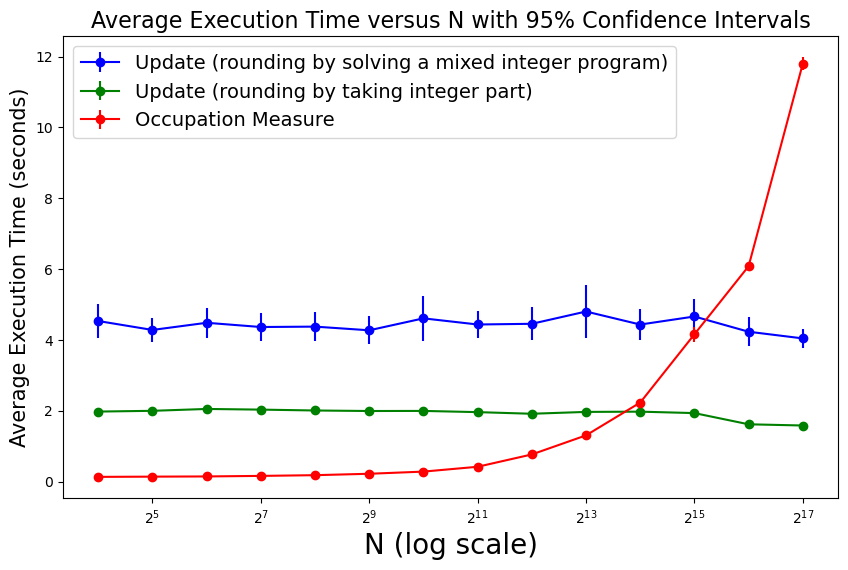

In [4]:
myN = [2**n for n in range(4, 18)]

# Plotting the average execution times with 95% confidence intervals
plt.figure(figsize=(10, 6))

labels = ['Update (rounding by solving a mixed integer program)', 'Update (rounding by taking integer part)', 'Occupation Measure']
colors = ['blue', 'green', 'red']

for i,func_name in enumerate(data):
    plt.errorbar(myN, data[func_name]['avg_times'], yerr=data[func_name]['std_errors'], label=labels[i], marker='o', color = colors[i])

plt.xlabel('N (log scale)',size=20)
plt.ylabel('Average Execution Time (seconds)',size=15)
plt.title('Average Execution Time versus N with 95% Confidence Intervals',size=16)
plt.legend(fontsize=14)
plt.xscale('log', base=2)  # Using log scale for x-axis

plt.savefig("time2.pdf")